In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df=pd.read_csv('C:/Users/plays/Hospital_project/ver_2_imputated_selected.csv')
df['Beat'].fillna('NA', inplace=True)

df_pos=df[df['Status']==1]
df_neg=df[df['Status']==0]

df_neg1=df_neg.iloc[0:75]
df_neg2=df_neg.iloc[75:148]
df_neg3=df_neg.iloc[148:216]
df_neg4=df_neg.iloc[216:284]
df_neg5=df_neg.iloc[284:361]

df1=pd.concat([df_pos,df_neg1])
df2=pd.concat([df_pos,df_neg2])
df3=pd.concat([df_pos,df_neg3])
df4=pd.concat([df_pos,df_neg4])
df5=pd.concat([df_pos,df_neg5])

def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    for c in df.columns:                                        #interperate easily.
        if df[c].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

def get_boolean(x):
  value=''
  if x==0: value=False
  elif x==1: value=True
  return value

scaler=MinMaxScaler()

for i in range(1,6):
  globals()['feature'+str(i)]=globals()['df'+str(i)].drop(['Temp_No','Cancer.1','Status','Dur_Event_day','Dur_Censored_day'],axis=1)
  globals()['feature'+str(i)]=labelencoder(globals()['feature'+str(i)])  
  globals()['feature'+str(i)]=abs(globals()['feature'+str(i)])

  ft=scaler.fit_transform(globals()['feature'+str(i)])
  globals()['feature'+str(i)]=pd.DataFrame(ft, columns=globals()['feature'+str(i)].columns)
  
  globals()['label'+str(i)]=globals()['df'+str(i)][['Status','Dur_Event_day','Dur_Censored_day']]
  globals()['label'+str(i)]['Status']=globals()['label'+str(i)]['Status'].apply(lambda x: get_boolean(x))
  globals()['label'+str(i)]['Dur_Event_day'].fillna(0,inplace=True)
  globals()['label'+str(i)]['Dur_Censored_day'].fillna(0,inplace=True)

  globals()['clf_label'+str(i)]=globals()['df'+str(i)][['Status']]
  globals()['label'+str(i)]['Duration']=globals()['label'+str(i)]['Dur_Censored_day']+globals()['label'+str(i)]['Dur_Event_day']
  globals()['label'+str(i)].drop(['Dur_Event_day','Dur_Censored_day'],axis=1, inplace=True)
  
  status=list(globals()['label'+str(i)]['Status'].values)
  duration=list(globals()['label'+str(i)]['Duration'].values.astype(int))
  globals()['st_label'+str(i)]=np.array([(status[0],duration[0])], dtype=[('Status','?'),('Duration','<f8')])
  for c in range(1,len(globals()['label'+str(i)].index)):
    lbl=np.array([(status[c],duration[c])], dtype=[('Status','?'),('Duration','<f8')])
    globals()['st_label'+str(i)]=np.append(globals()['st_label'+str(i)],lbl,axis=0)


C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3290606665.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['label'+str(i)]['Status']=globals()['label'+str(i)]['Status'].apply(lambda x: get_boolean(x))
C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3290606665.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['label'+str(i)]['Dur_Event_day'].fillna(0,inplace=True)
C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3290606665.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3290606665.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['label'+str(i)]['Status']=globals()['label'+str(i)]['Status'].apply(lambda x: get_boolean(x))
C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3290606665.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['label'+str(i)]['Dur_Event_day'].fillna(0,inplace=True)
C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3290606665.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [57]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

feature=df.drop(['Temp_No','Cancer.1','Status','Dur_Event_day','Dur_Censored_day'],axis=1)
def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    for c in df.columns:                                        #interperate easily.
        if df[c].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

feature=labelencoder(feature)  
feature=abs(feature)
scaler=MinMaxScaler()
ft=scaler.fit_transform(feature)
feature=pd.DataFrame(ft, columns=feature.columns)
feature

label=df[['Status','Dur_Event_day','Dur_Censored_day']]
label['Dur_Event_day'].fillna(0,inplace=True)
label['Dur_Censored_day'].fillna(0,inplace=True)
def get_boolean(x):
  value=''
  if x==0: value=False
  elif x==1: value=True
  return value

label['Status']=label['Status'].apply(lambda x: get_boolean(x))

label['Duration']=label['Dur_Censored_day']+label['Dur_Event_day']
label.drop(['Dur_Event_day','Dur_Censored_day'],axis=1, inplace=True)

label1=df['Status']

C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3743882613.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['Dur_Event_day'].fillna(0,inplace=True)
C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3743882613.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['Dur_Censored_day'].fillna(0,inplace=True)
C:\Users\plays\AppData\Local\Temp\ipykernel_6688\3743882613.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

<AxesSubplot:xlabel='n'>

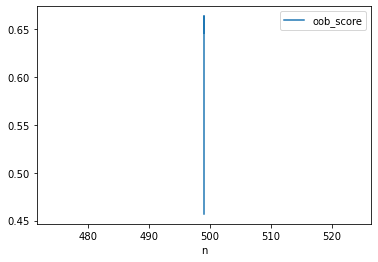

In [6]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import KFold,GridSearchCV
import warnings
warnings.simplefilter('ignore')

X_train,X_test,y_train,y_test=train_test_split(feature1,clf_label1,stratify=clf_label1,random_state=10,test_size=0.2)
oob_scores=[]
for n in range(1,501):
    n_estimators=n
    model=RandomForestClassifier(n_estimators=n, criterion='entropy',max_depth=5,random_state=10,oob_score=True)
    model.fit(X_train,y_train)
    oob_scores.append(model.oob_score_)
data=pd.DataFrame({'n':n, 'oob_score':oob_scores})
data.plot(x='n',y='oob_score')

<AxesSubplot:xlabel='n'>

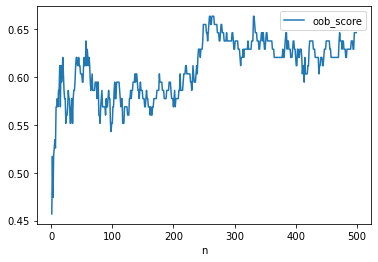

In [10]:
data=pd.DataFrame({'n':np.arange(1,500), 'oob_score':oob_scores})
data.plot(x='n',y='oob_score')

<AxesSubplot:xlabel='n'>

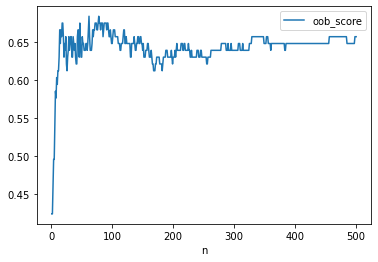

In [11]:
X_train,X_test,y_train,y_test=train_test_split(feature4,clf_label4,stratify=clf_label4,random_state=10,test_size=0.2)
oob_scores=[]
for n in range(1,501):
    n_estimators=n
    model=RandomForestClassifier(n_estimators=n, criterion='entropy',max_depth=5,random_state=10,oob_score=True)
    model.fit(X_train,y_train)
    oob_scores.append(model.oob_score_)
data=pd.DataFrame({'n':np.arange(1,501), 'oob_score':oob_scores})
data.plot(x='n',y='oob_score')

In [71]:
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SMOTE,SVMSMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=40,sampling_strategy='minority')
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,stratify=label1,random_state=42)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', feature.shape, label1.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (461, 36) (461,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (622, 36) (622,)
SMOTE 적용 후 레이블 값 분포: 
 1    311
0    311
Name: Status, dtype: int64


In [74]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=50,max_depth=5,random_state=10,oob_score=True)
model.fit(X_train_over,y_train_over)
pred=model.predict(X_test)
accuracy=accuracy_score(pred,y_test)
report=classification_report(pred,y_test)
print(accuracy)
print(report)

0.7419354838709677
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.29      0.22      0.25        18

    accuracy                           0.74        93
   macro avg       0.55      0.54      0.55        93
weighted avg       0.72      0.74      0.73        93



C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\plays\anaconda3\envs\stroke_project\lib\site-pa

<AxesSubplot:xlabel='n'>

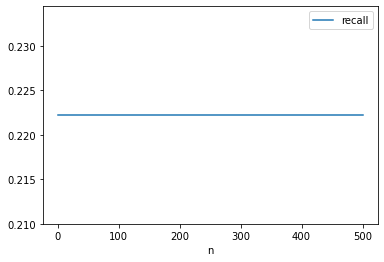

In [81]:
from sklearn.metrics import recall_score
oob_scores=[]
recalls=[]
for n in range(1,501):
    n_estimators=n
    model=RandomForestClassifier(n_estimators=n, criterion='entropy',max_depth=5,random_state=10,oob_score=True)
    model.fit(X_train_over,y_train_over)
    oob_scores.append(model.oob_score_)
    recalls.append(recall_score(pred,y_test))
data=pd.DataFrame({'n':np.arange(1,501), 'recall':recalls})
data.plot(x='n',y='recall')

In [73]:
from xgboost import XGBClassifier
clf_xgb=XGBClassifier()
clf_xgb.fit(X_train_over,y_train_over)
clf_xgb_pred=model.predict(X_test)
report=classification_report(clf_xgb_pred,y_test)
print(report)

C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:05:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.29      0.22      0.25        18

    accuracy                           0.74        93
   macro avg       0.55      0.54      0.55        93
weighted avg       0.72      0.74      0.73        93

